# Assesment 3 - Quantum Harmonic Oscillator
## Ben Elliot - 21005900


In this notebook we will be looking at the Quantum Harmonic Oscillator (QHO).

The Hamiltonian for the QHO given in atomic units is:
$$ \hat{H} = \hat{T} + \hat{V} = -\frac{1}{2} \frac{d^2}{dx^2} + \frac{1}{2} k x^2 $$

In htis notebook, we will set $k$ = 1.

We will first create the wavefunction which is defined as:

$$\psi(x) = [\frac{2\alpha}{\pi}]^{\frac{1}{4}} e^{-\alpha x^2} $$

Where we set $\alpha$ = 1. We then calculate the second derivative of the wavefunction using the method of finite differences and finally calculate the energy contributions of kinetic and potential energy.

In [1]:
#Import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Section 1 - The Wavefunction and $2^{nd}$Derivative


In [2]:
dx = 0.00009 # The spacing between points 
N = 10/dx # Number of points in the array (10 is the width of the interval)
x = np.linspace(-5, 5, int(N)) 
alpha = 1
psi = (2*alpha/np.pi)**(1/4) * np.exp(- alpha * x**2) # psi(x) from x= -5 to 5 with N points
print(len(psi) % 2) # Checking that the number of entries in psi is odd for simpsons rule later

1


I chose the value 0.00009 or 9e-5 for the spacing between points as I felt it gave a small enough spacing that the final answer I got was precise enough without making the spaces to small and getting rounding and floating point errors. It also meant I got an odd number of points in my psi array so that simpons method would work properly in section 2.

Calculating the second derivative using finite differences and the formula:

$$ f^{''}(x) ≃ \frac{f(x+Δx)-2f(x)+f(x-Δx)}{Δx^2}$$

In [3]:
def d2f(f, dx):
    """
    Calculates the second derivative of a function.
    Inputs:
    f - 1D ARRAY - The array of points of f(x) for the derivative to be calculated on
    dx - The step size between points 
    Returns:
    d2_f - second derivative of the function
    """
    
    d2_f = (np.roll(f, -1) - 2*f + np.roll(f, 1)) / ((dx)**2)
    return d2_f

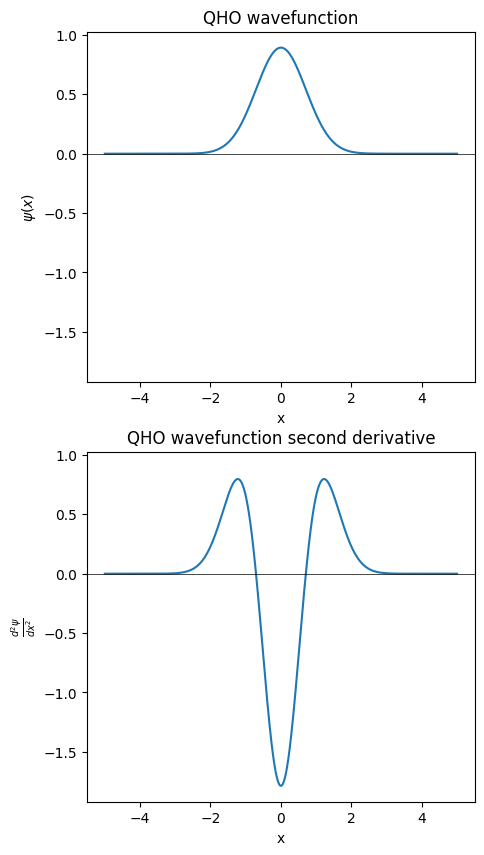

In [4]:
# Calculate psi''
d2psi = d2f(psi, dx)

#Setting up the plot
fig = plt.figure(figsize = (5, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex = ax1, sharey = ax1)

#Plotting psi against x
ax1.plot(x, psi)
ax1.axhline(color='k', linewidth=0.5)
ax1.set(xlabel="x", ylabel=r"$\psi(x)$", title="QHO wavefunction")

#Plotting d2psi against x
ax2.plot(x, d2psi)
ax2.axhline(color='k', linewidth=0.5)
ax2.set(xlabel="x", ylabel=r"$\frac{d^2 \psi}{dx^2}$", title="QHO wavefunction second derivative");

### Section 2 - Evaluating energies

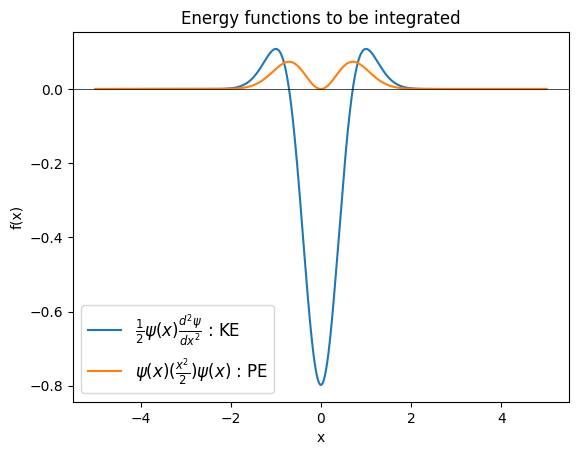

In [5]:
# Plot psi*d2psi and psi*(0.5*x*x)*psi
# Remember labels, legend, title
plt.plot(x, 1/2 * psi * d2psi, label=r"$\frac{1}{2} \psi(x) \frac{d^2 \psi}{dx^2}$ : KE")
plt.plot(x,  psi * (x**2)/2 * psi, label=r"$\psi(x) (\frac{x^2}{2})\psi(x)$ : PE")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Energy functions to be integrated")
plt.axhline(color='k', linewidth=0.5)

plt.legend(fontsize="12");

In [6]:
from scipy import integrate

#Calculating the energy contributions
#UNIT Ha = HARTREE
KE = -1/2 * integrate.simps(psi * d2psi, x)
PE = 1/2 * integrate.simps(psi * (x**2) * psi, x)
print("""
Kinetic Energy = {} Ha
Potential Energy = {} Ha
""".format(KE, PE))



Kinetic Energy = 0.5000099992059802 Ha
Potential Energy = 0.12499999999999999 Ha



### Conclusions
From these values we can see the contribution of the kintetic energy is much larger than the contribution of the potential energy. This is what we expected from the graphs with the kinetic energy graph having a much larger area between the graph and the x axis compared to the area under the potential energy.